## Exercici 1
Parteix el conjunt de dades adjunt en train i test.  
Estudia els dos conjunts per separat, a nivell descriptiu.  
  
_També adjunt trobaràs una descripció de les diferents variables del dataset._

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('housing data.csv', header=None)
housing

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

#### Observacions

El dataset que tenim te 14 columnes i 506 files. Ens mostra una serie de valors que anirem explicant a continuació.  
Veiem que no te capçaleres.  
Després de veure els noms de les variables que donen nom a la columna. Podem veure que la columna CHAS era una columna categorica convertida a númerica perquè així la podem tenir en compte a l'hora de fer la predicció. (dummie)
**Es tracta d'un dataset de l'atllojament a Boston**

#### Coses a fer abans de res

1. Posar nom a les capçaleres amb la informació donada en el fitxer txt
2. Explicació de les variables que seran els noms de les columnes. 
3. Comprovar els dtypes son els que volem
4. Comprovar que nom hi hagi nulls, ni Nans ni duplicats

#### 1. Posem nom a les capçaleres

In [3]:
#Posem noms a les columnes i mostrem les 10 primeres files.
noms_columnes = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing.columns = noms_columnes
housing.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1  
8     15.2  386.63  29.93  16.5  
9     15.2  386.71  17.10  18.9

#### 2. Expliquem les variables que donen nom a les columnes

In [4]:
#Creació de les columnes
nom_variables = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
descripcio_variables = ["Taxa de delinqüència per capita per ciutat", "proporció de sòl residencial zonificar per a lots de mes de 25000 m2", "proporció d'hectàrees comercials no inoristes per ciutat", "Variable ficticia Charles River (=1 si el tram limita el riu, 0 en cas contrari)",  "concentració d'òxids nitrics (parts per 10 millons)", "promig del número d'habitacions per habitatge", "proporció d'unitats ocupades pel propietari construides abans de 1940",  "distancies ponderades fins a cinc centres d'ocupació de Boston",  "index d'accessibilitat a les carreteres radials",  "taxa d'impost sobre béns inmobles de valor total per 10.000",  "ràtio d'alumnes-professor per minicipi",  "1000(Bk - 0,63)^2 on Bk és la proporció de negres per ciutat",  "% d'estatus inferior de la població",  "Valor mitja de les cases ocupades pel propietari en 1000 dolars", ]
tipus_variables = ["float", "float o int", "float", "int", "float", "float", "float", "float", "int", "int o float", "float", "float", "float", "float"]

#Unio de les columnes
taula_variables = list(zip(nom_variables, descripcio_variables, tipus_variables))

#Creem el df i fem que la primera columna sigui l'index
df_variables = pd.DataFrame(taula_variables, columns=["Nom Variable", "Descripció Variable", "Dtype"])
df_variables = df_variables.set_index("Nom Variable", drop=True)

#Fem que les columnes mostrin un maxim de 100 caracters.
pd.set_option('display.max_colwidth', 100)

#Mostrem el df
df_variables


Descripció Variable  \
Nom Variable                                                                                     
CRIM                                                Taxa de delinqüència per capita per ciutat   
ZN                        proporció de sòl residencial zonificar per a lots de mes de 25000 m2   
INDUS                                 proporció d'hectàrees comercials no inoristes per ciutat   
CHAS          Variable ficticia Charles River (=1 si el tram limita el riu, 0 en cas contrari)   
NOX                                        concentració d'òxids nitrics (parts per 10 millons)   
RM                                               promig del número d'habitacions per habitatge   
AGE                      proporció d'unitats ocupades pel propietari construides abans de 1940   
DIS                             distancies ponderades fins a cinc centres d'ocupació de Boston   
RAD                                            index d'accessibilitat a les carreteres radials   
TAX                                taxa d'impost sobre béns inmobles de valor total per 10.000   
PTRATIO                                                 ràtio d'alumnes-professor per minicipi   
B                                 1000(Bk - 0,63)^2 on Bk és la proporció de negres per ciutat   
LSTAT                                                      % d'estatus inferior de la població   
MEDV                           Valor mitja de les cases ocupades pel propietari en 1000 dolars   

                    Dtype  
Nom Variable               
CRIM                float  
ZN            float o int  
INDUS               float  
CHAS                  int  
NOX                 float  
RM                  float  
AGE                 float  
DIS                 float  
RAD                   int  
TAX           int o float  
PTRATIO             float  
B                   float  
LSTAT               float  
MEDV                float

In [5]:
#Comrpovem la info del nostre df ja que ens dira quants No nulls hi ha i el dtypes de les columnes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


_En principi no hi ha nulls i els dtypes estan tots correctes_

#### 3. Comprovem que no hi hagi ni NaNs ni Nulls ni duplicats (Nulls hem vist anteriormente que no n'hi ha).

In [6]:
#Comprovem NaNs
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#Comprovem duplicats
housing.duplicated().sum()

0

_El df sembla net, **no** existeixen valors **Nulls, NaNs ni duplicats**_ Dic sembla i no afirmo perquè sempre ens podem trobar amb valors extranys o atipics més endevant un cop l'estudiem més a fons.

# Procedim a partir el conjunt de dades en 2 df.

Un ens servira per entrenar i l'altre per provar però abans haurem de decidir quina variable es la objectiva o de sortida (target) i quina o quines variables ens serveixen per alimentar la nostra predicció (features).

En aquest cas, amb la lectura de les variables ja veiem que el més interessant és caclular o predir el valor mitja de les cases ocupades pel propietari en 1000$ (MEDV), és a dir la variable dependent, i la resta son les que ens ajudaren a predir amb més exactitud, és a dir les variables independents. 

In [8]:
X = housing.drop(['MEDV'], axis=1)

y = housing[['MEDV']]

print('El número de files i columnes de X és:', X.shape)
print('El número de files i columnes de y és:', y.shape)

El número de files i columnes de X és: (506, 13)
El número de files i columnes de y és: (506, 1)


In [9]:
#importem la llibreria i el model per poder dividir el nostre df
from sklearn.model_selection import train_test_split

#dividim el model en dos a partir del df original (80% de les dades aniran a Housing_train i la resta a Housing_test )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Uneixo les variables de nou per tenir dos dataframes per si ho necessito més endevant
housing_train = pd.concat([X_train, y_train], axis=1)
housing_test = pd.concat([X_test, y_test], axis=1)

# Procedim a fer l'analisi de cada un dels df resultants (Train i test)

Crec que es interessant fer-ho en pararl·lel per poder observar les diferències (si hi ha) i les similituds entre els dos df train i test tenint en compte que un conte el 80% de les dades i l'altre el 20. A veure com es mostren estadisticament i la informació que ens donen abans de fer res amb ells.

In [10]:
#Mirem la informació del df d'entrenament housing_train
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 136 to 14
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.3 KB


In [11]:
#Mirem la informació del df d'entrenament housing_train
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 81 to 496
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.0 KB


_Veiem que el df d'entrenament te 404 files i 14 columnes. No te valors Nulls (ja ho sabiem) i es conserven els mateix dtypes. Per altra banda el df de prova te 102 files i 14 columnes. I conserva els mateixos valors refernts a Nulls i dtypes._

### RESUM ESTADÍSTIC

In [12]:
#Mirem el resum estadístic del df d'entrenament housing_train
re_housing_train = housing_train.describe().T
re_housing_train['median'] = housing_train.median()
re_housing_train


count        mean         std        min         25%         50%  \
CRIM     404.0    3.628099    8.061247    0.00906    0.083545    0.266005   
ZN       404.0   11.823020   24.056132    0.00000    0.000000    0.000000   
INDUS    404.0   11.119851    6.760515    0.46000    5.190000    9.690000   
CHAS     404.0    0.066832    0.250040    0.00000    0.000000    0.000000   
NOX      404.0    0.555044    0.117856    0.38500    0.448000    0.538000   
RM       404.0    6.259978    0.710706    3.56100    5.876750    6.170500   
AGE      404.0   68.275495   28.559247    6.00000   42.550000   77.900000   
DIS      404.0    3.833557    2.136720    1.12960    2.110800    3.231000   
RAD      404.0    9.764851    8.822577    1.00000    4.000000    5.000000   
TAX      404.0  411.032178  168.634691  188.00000  280.500000  334.000000   
PTRATIO  404.0   18.499505    2.172716   12.60000   17.400000   19.100000   
B        404.0  354.911040   93.365301    0.32000  374.702500  391.260000   
LSTAT    404.0   12.867525    7.177930    1.92000    7.185000   11.675000   
MEDV     404.0   22.331436    9.193850    5.00000   16.775000   21.000000   

                75%       max      median  
CRIM       3.840055   73.5341    0.266005  
ZN        12.500000  100.0000    0.000000  
INDUS     18.100000   27.7400    9.690000  
CHAS       0.000000    1.0000    0.000000  
NOX        0.631000    0.8710    0.538000  
RM         6.590750    8.7800    6.170500  
AGE       94.100000  100.0000   77.900000  
DIS        5.218725   10.7103    3.231000  
RAD       24.000000   24.0000    5.000000  
TAX      666.000000  711.0000  334.000000  
PTRATIO   20.200000   22.0000   19.100000  
B        396.242500  396.9000  391.260000  
LSTAT     17.102500   37.9700   11.675000  
MEDV      24.725000   50.0000   21.000000

In [13]:
#Mirem el resum estadístic del df d'entrenament housing_test
re_housing_test = housing_test.describe().T
re_housing_test['median'] = housing_test.median()
re_housing_test


count        mean         std        min         25%        50%  \
CRIM     102.0    3.555792   10.518426    0.00632    0.062793    0.19966   
ZN       102.0    9.544118   20.160262    0.00000    0.000000    0.00000   
INDUS    102.0   11.203824    7.276731    1.38000    5.145000    8.35000   
CHAS     102.0    0.078431    0.270177    0.00000    0.000000    0.00000   
NOX      102.0    0.553313    0.108228    0.40100    0.465250    0.52800   
RM       102.0    6.382294    0.663986    4.62800    5.969000    6.33800   
AGE      102.0   69.760784   26.562499    2.90000   52.075000   76.25000   
DIS      102.0    3.642497    1.980797    1.20240    2.073700    3.18400   
RAD      102.0    8.696078    8.220705    1.00000    4.000000    5.00000   
TAX      102.0  397.166667  168.522119  187.00000  276.750000  307.00000   
PTRATIO  102.0   18.281373    2.135542   13.00000   16.825000   18.60000   
B        102.0  363.656863   82.644276    3.65000  377.690000  392.40000   
LSTAT    102.0   11.803627    6.962796    1.73000    6.415000   10.34500   
MEDV     102.0   23.330392    9.211861    6.30000   17.125000   22.40000   

                75%       max     median  
CRIM       1.873483   88.9762    0.19966  
ZN         9.375000   90.0000    0.00000  
INDUS     18.100000   27.7400    8.35000  
CHAS       0.000000    1.0000    0.00000  
NOX        0.609000    0.8710    0.52800  
RM         6.727500    8.0690    6.33800  
AGE       93.225000  100.0000   76.25000  
DIS        4.812200   12.1265    3.18400  
RAD        8.000000   24.0000    5.00000  
TAX      437.000000  711.0000  307.00000  
PTRATIO   20.200000   21.2000   18.60000  
B        396.120000  396.9000  392.40000  
LSTAT     16.320000   34.3700   10.34500  
MEDV      28.300000   50.0000   22.40000

Hem trasposat els df perquè m'agrada més visualment. Veiem que alguns valors es mantenen més o menys similars mentre que altres no. A simple vista podriem dividir-los aixi:

**Variables similars**
CHAS, NOX, RM, DIS, RAD, PATRATIO, LSTAT, MEDV
**Variables mes o menys similars**
CRIM, INDUS, AGE, TAX, B
**Variables que hi ha més diferència entre els 2 df**
ZN

Veiem que en la majoria de variables la distribució dels quartils no es proporcional, tenen una STD alta o bé una diferència considerable entre la mitja i la mitjana. Això ens fa pensar que ens trobarem amb outliers i una distribució de les dades no normal i, per tan,t hauran de ser preprocessades. 

També veiem que les variables ZN i CHAS tenen poques dades o molts zeros (en el cas de CHAS al ser 1 o 0 es normal, mentre que ZN singifica que hi ha poques dades). 

Observem que mes o menys aquests dos punts anteriors ho trobem als dos df. 

#### Grafiquem el df d'entrenament (housing_train) i després el df (housing_test) en que veiem com es correlecionen amb cada una de les variables

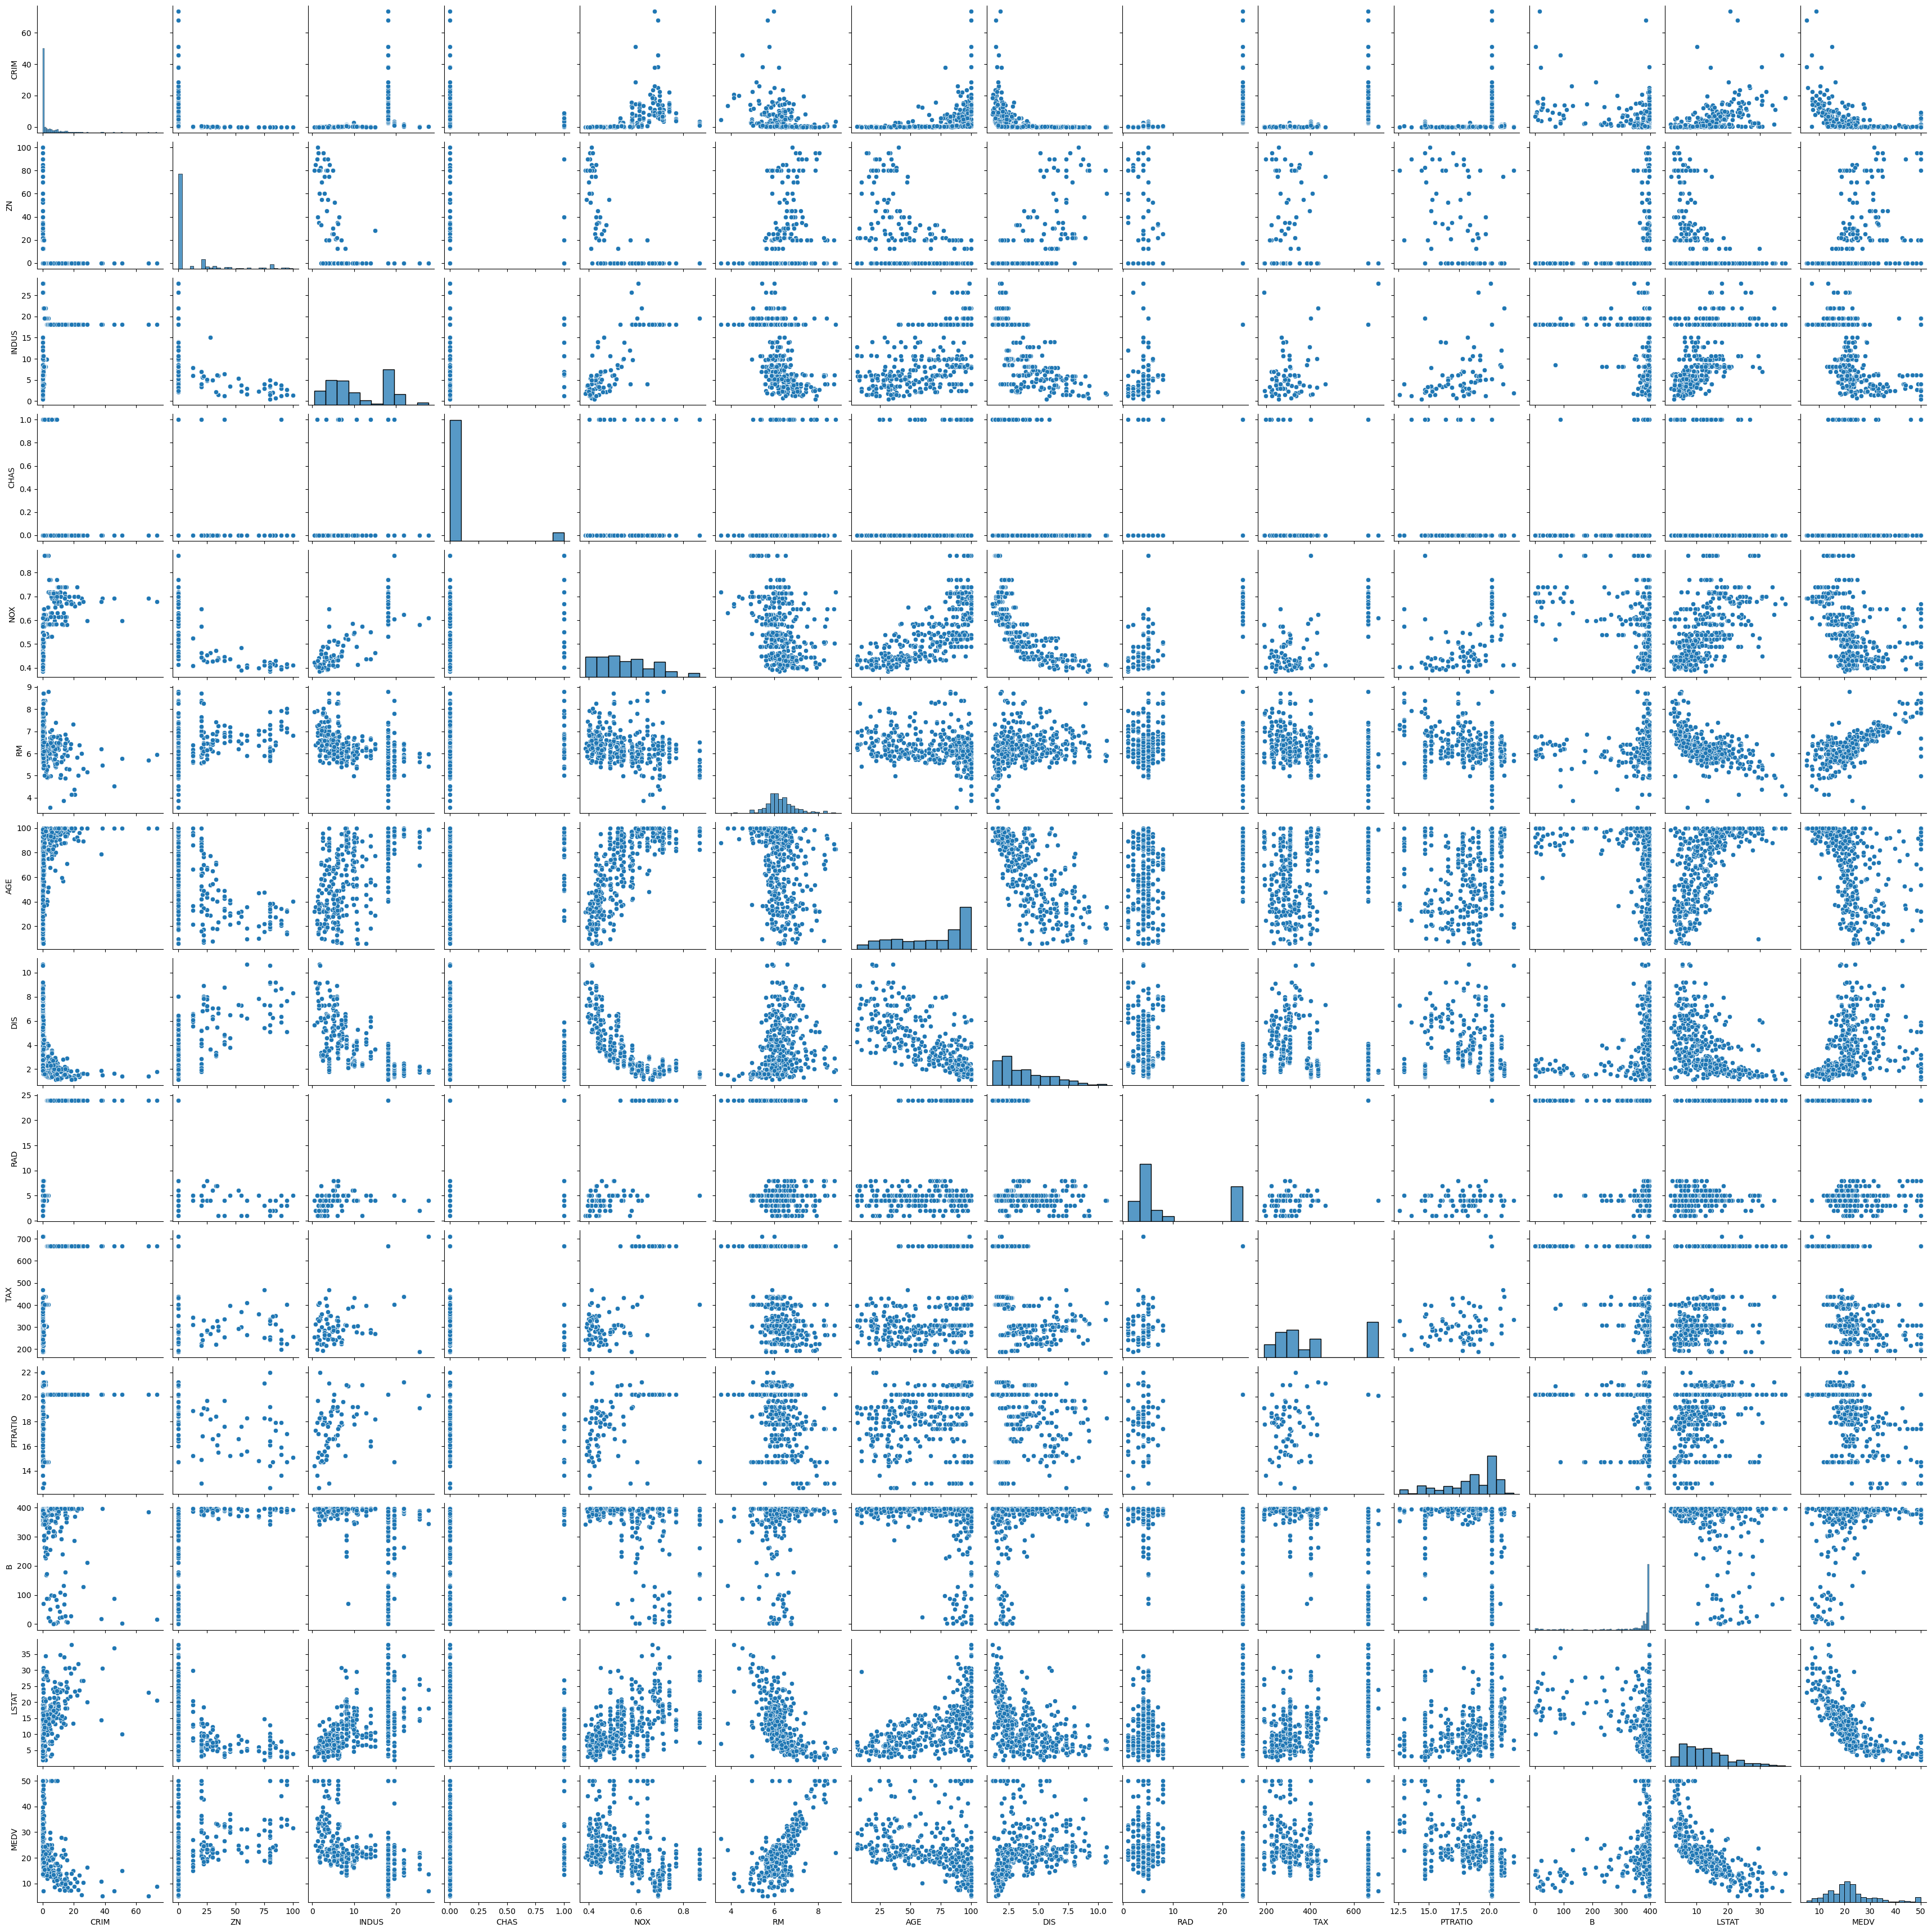

In [14]:
#importem llibreries
import matplotlib.pyplot as plt
import seaborn as sns

#Creem gràfics
sns.pairplot(housing_train)
plt.show()

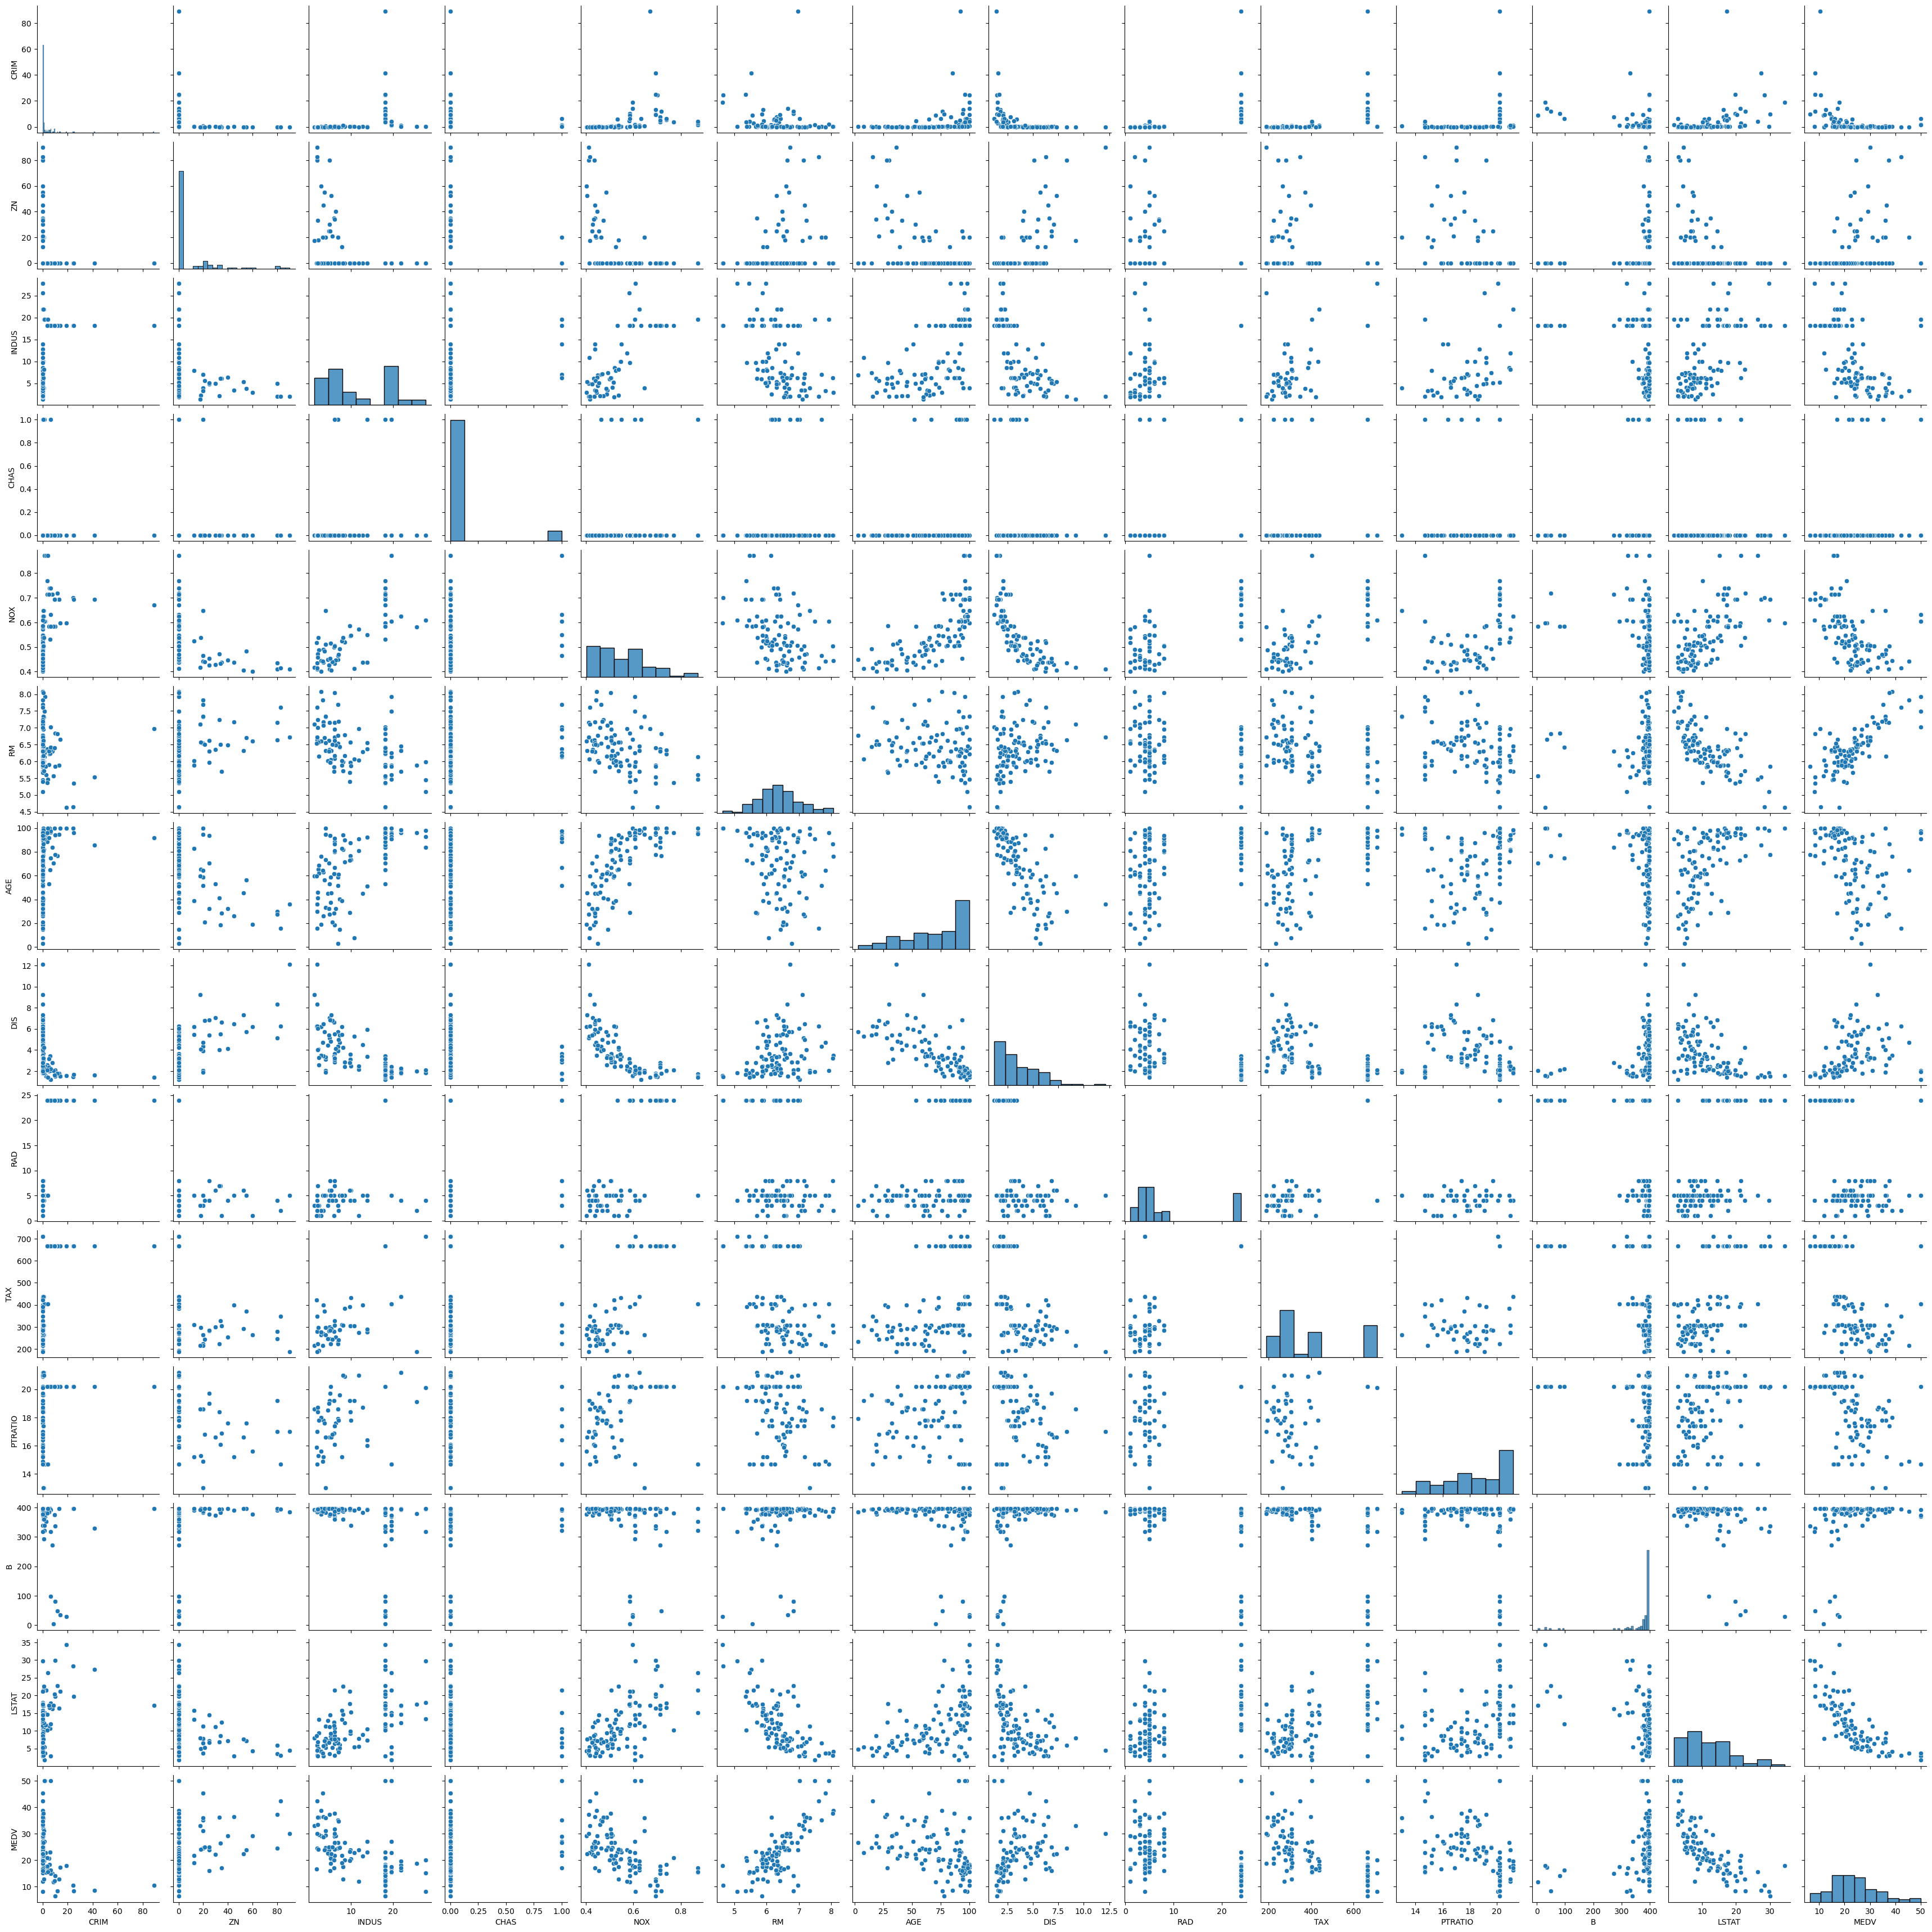

In [15]:
#Creem gràfics
sns.pairplot(housing_test)
plt.show()

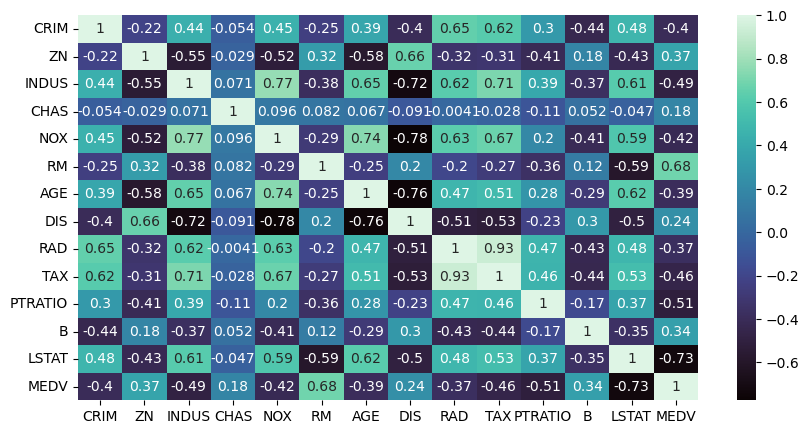

In [16]:
# Heatmap on data_test
plt.figure(figsize=(10, 5))
sns.heatmap(housing_train.corr(), annot = True, cmap="mako")
plt.show()

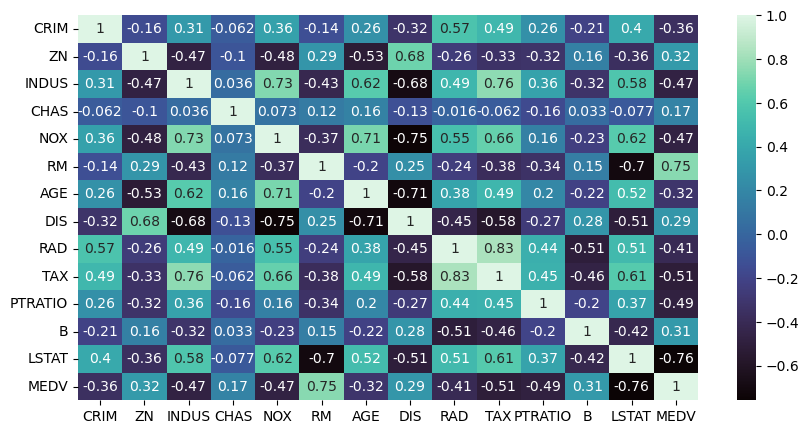

In [17]:
# Heatmap on data_test
plt.figure(figsize=(10, 5))
sns.heatmap(housing_test.corr(), annot = True, cmap="mako")
plt.show()

**OBSERVACIONS:** Marquem que una correlació sigui interessant entre 0,6 i 0,8 (o els seus negatius), Al voltant de 0,5 significa que es possible, com més aprop a 0 significa que la correlació es nula, i més de 0,8 la podriem considerar altes.
Evidenment el df de prova te menys dades que el df d'entrenament. 

**Correlacions housing_train**
Quasi totes les variables tenen algún tipus de correlació amb altres > 60% exceptuant CHAS (dummie), PTRATIO i B.
Destacaria les correlacions de més de 75%:
1. INDUS amb NOX
2. NOX amb INDUS i DIS
3. RAD amb TAX (90% molt alta)
I també destacaria les correlacions que te el nostre target (MEDV) amb LSTAT i RM.

**Correlacions housing_test**
Quasi totes les variables tenen algún tipus de correlació amb altres > 60% exceptuant CHAS (dummie) i B.
Destacaria les correlacións de més de 75%:
1. CRIM amb RAD
2. INDUS amb TAX (84%), RAD, NOX(81%)
3. NOX amb DIS (81%), AGE, INDUS (81%)
4. RM amb MEDV(81%)
5. AGE amb DIS (82%) i NOX
6. DIS amb AGE (82%), NOX (81%), INDUS i ZN
7. RAD amb TAX (95%), INDUS i CRIM
8. TAX amb RAD (95%), INDUS
9. LSTAT amb MEDV
10. MEDV amb LSTAT, RM (81%)
I també destacaria les correlacions que te el nostre target (MEDV) amb LSTAT, PTRATIO, RM i INDUS.

**Comparativa correlacions**
Podem veure que les correlacions que hi ha al df_test (housing_test) son més i més altes. Totes les correlacions de df d'entrenament es repeteixen el test. Això és possible que sigui perque tingui menys dades però en cap cas ho podem afirmar, només destacar. 

## Veiem com es comporta la nostra variable dependent o target (MEDV) 

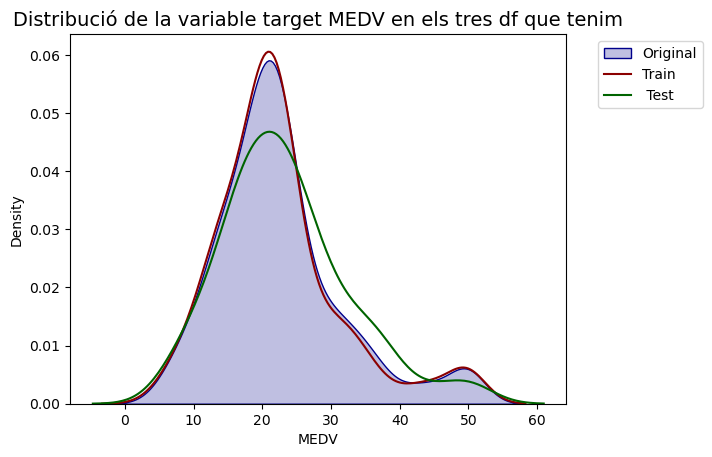

In [18]:
sns.kdeplot(y['MEDV'], label='Original', color='Darkblue', fill=True)
sns.kdeplot(y_train['MEDV'], label='Train', color='Darkred', fill=False)
sns.kdeplot(y_test['MEDV'], label=' Test', color='Darkgreen', fill=False)

plt.title("Distribució de la variable target MEDV en els tres df que tenim", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Podem observar que es comporta d'una forma bastant similar. També observem que no sembla que tingui una forma Gaussiana

### Exercici 2
**Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)**

#### Primer mirem quin tipus de variables tenim en Model d'entrenament

In [19]:
#Mirem si te una distribució normal (Gaussiana) tenint en compte que alfa = 5% (0.05)
from scipy import stats
from scipy.stats import shapiro

print("Hipotesis nula (H0): La mostra te una distribució normal (Probablement Gaussiana).")
print("Hipotesis alternativa (H1): La mostra no te una distribució normal (Probablement no Gaussiana).\n")

for i in X_train.columns:
    shapiro_test = stats.shapiro(X_train[i])
    print("La variable", i, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("S'accepta la hipotesis nula, la mostra te una distribució normal (Probablement Gaussiana).\n")
    else:
        print("Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)\n")

Hipotesis nula (H0): La mostra te una distribució normal (Probablement Gaussiana).
Hipotesis alternativa (H1): La mostra no te una distribució normal (Probablement no Gaussiana).

La variable CRIM te un P-value de 1.8077723379152504e-32
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable ZN te un P-value de 1.2479946106013432e-30
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable INDUS te un P-value de 1.0522466898800335e-15
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable CHAS te un P-value de 5.672741375850319e-37
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable NOX te un P-value de 2.60834192786219e-12
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable RM te un P-value de 1.87919582672

<Figure size 640x480 with 0 Axes>

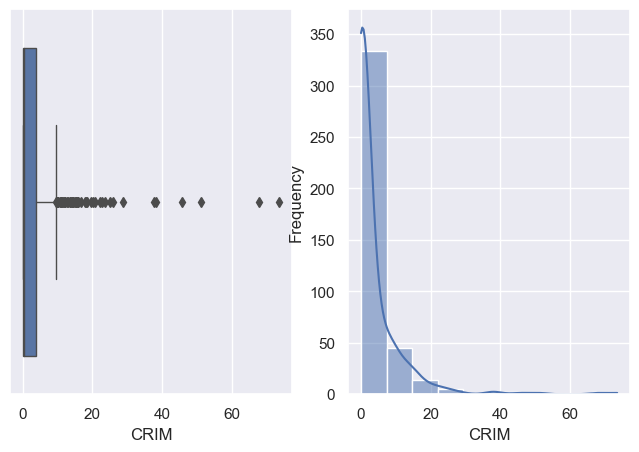

<Figure size 800x500 with 0 Axes>

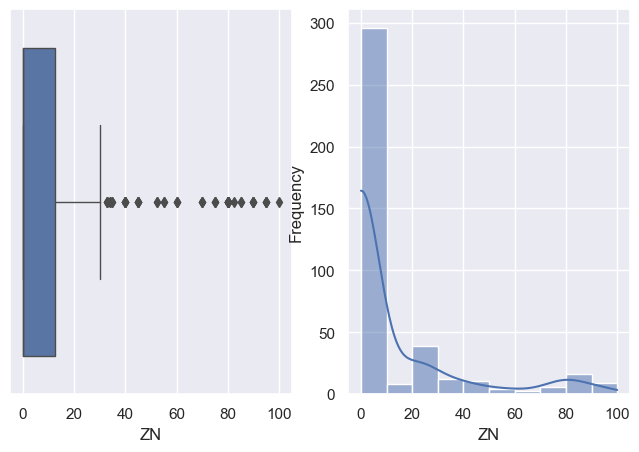

<Figure size 800x500 with 0 Axes>

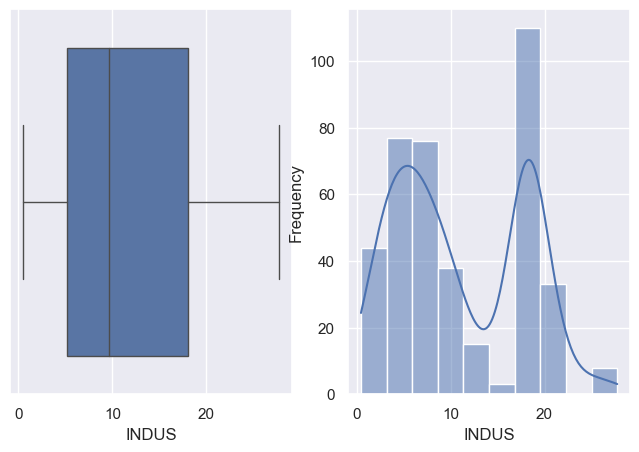

<Figure size 800x500 with 0 Axes>

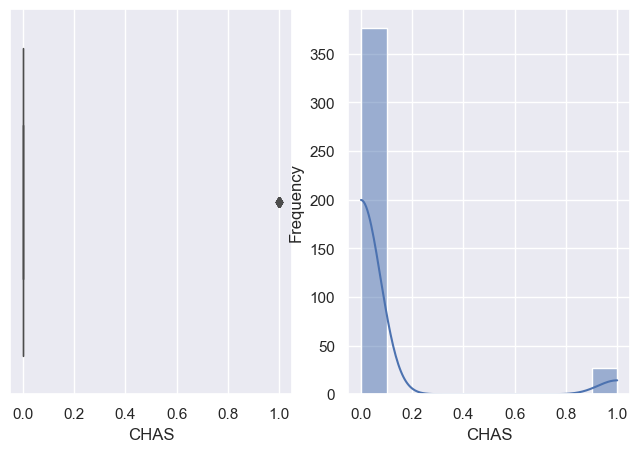

<Figure size 800x500 with 0 Axes>

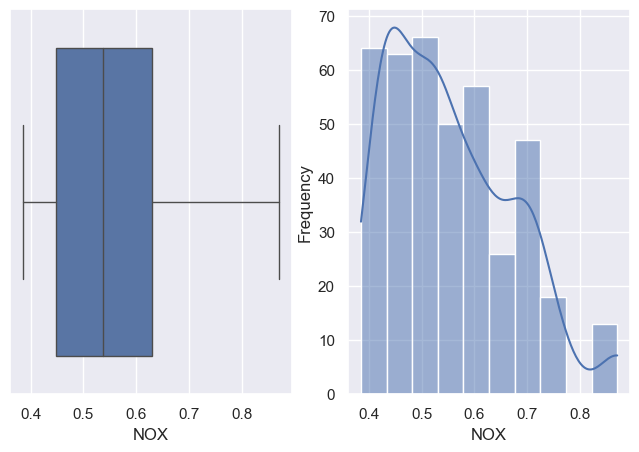

<Figure size 800x500 with 0 Axes>

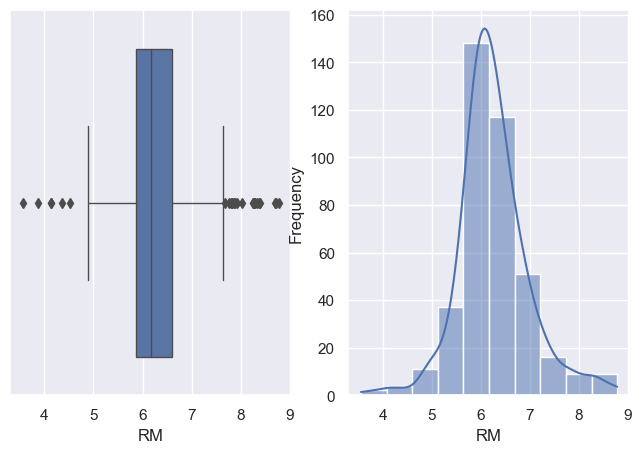

<Figure size 800x500 with 0 Axes>

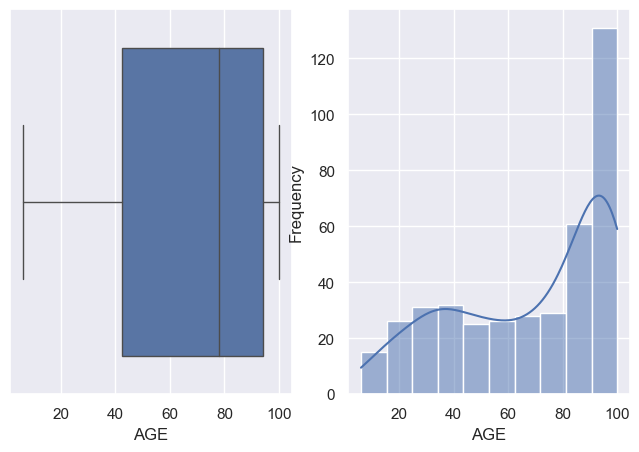

<Figure size 800x500 with 0 Axes>

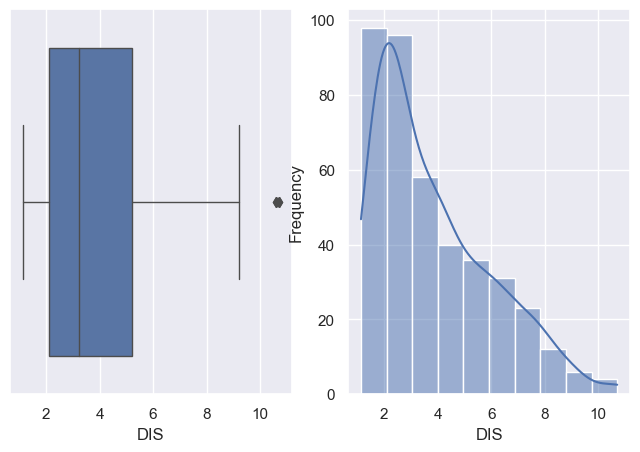

<Figure size 800x500 with 0 Axes>

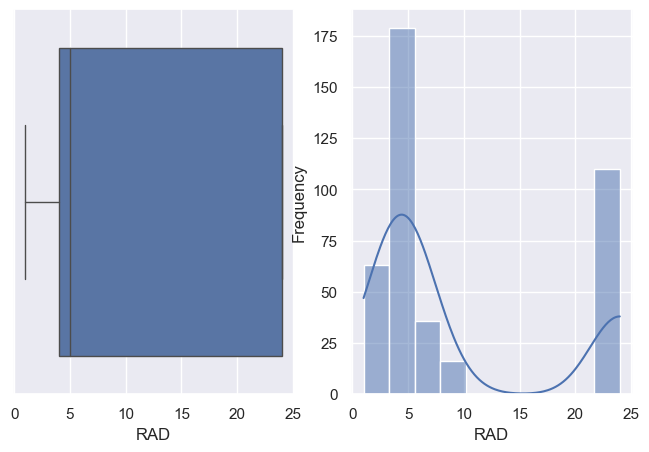

<Figure size 800x500 with 0 Axes>

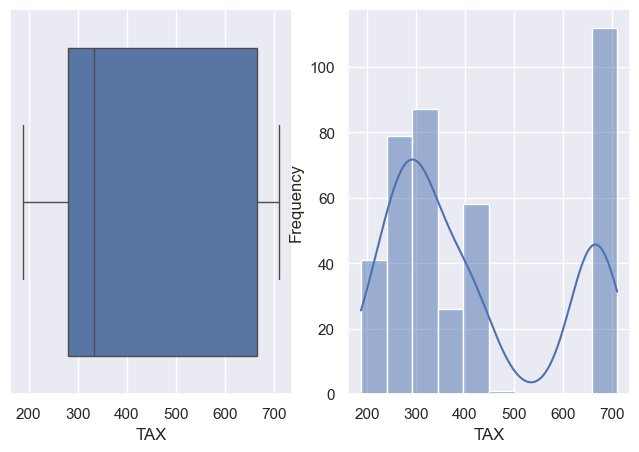

<Figure size 800x500 with 0 Axes>

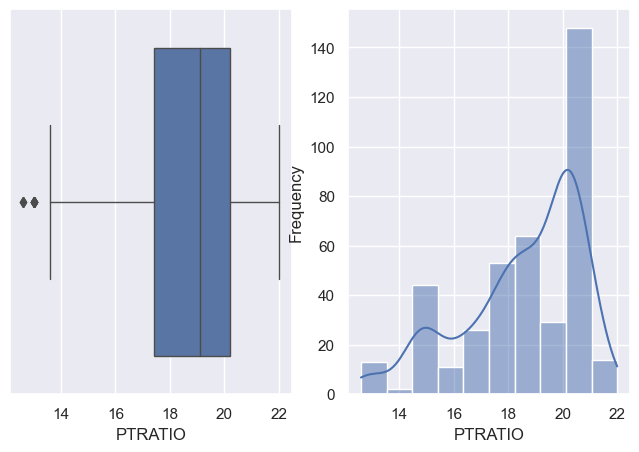

<Figure size 800x500 with 0 Axes>

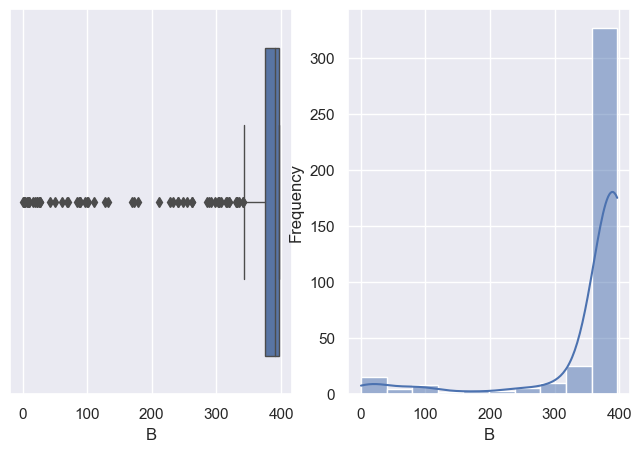

<Figure size 800x500 with 0 Axes>

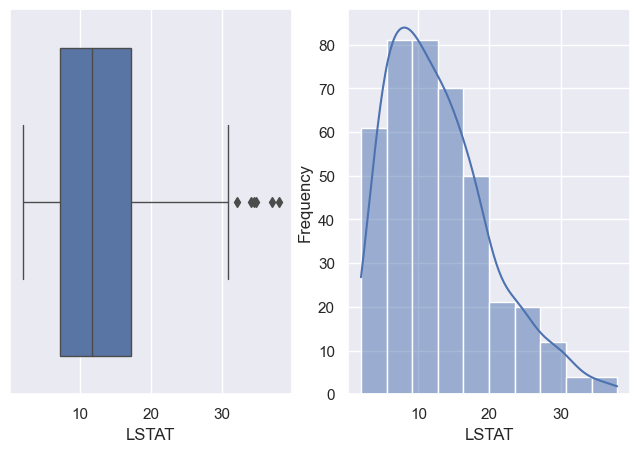

In [20]:
#Grafiquem les variables per veure els outliers utilitzant boxplot
import warnings
warnings.filterwarnings("ignore")

for i in X_train.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(1, 2, sharex=True)
    plt.gca().set(xlabel=i, ylabel='Frequency')
    sns.boxplot(X_train[i], ax=ax_box, linewidth=1, orient='v')
    sns.histplot(X_train[i], ax=ax_hist, bins=10, kde=True)
plt.show()

### TIPUS DE VARIABLES QUE TENIM (Model Train):

En primer lloc, destacar que en el nostre test d'hipotesi Saphiro ens ha resultat que cap variable (feature) te una distrubció normal o probablement Gaussiana. Per tant no utilitzarem la standerització.

Tenim tres tipus de variables:
   1. Categorica convertida en dummie (CHAS) -> No farem res ja que està en **dummie ja**.
   2. Categorica ordinal (RAD) -> No farem res **ja està enumerada**.
   3. Numèriques:
       + Amb Outliers (LSTAT, B, PTRATIO, DIS, RM, ZN, CRIM) -> Farem un **RobustScaler**.
       + Sense Outliers (INDUS, NOX, AGE, TAX) -> Farem un **MinMaxScaler**

La variable MEDV com que és la nostra variable ojectiu (target) **no la transformem**


#### I ara comprovem si són iguals en el Model Test

In [21]:
#Mirem si te una distribució normal (Gaussiana) tenint en compte que alfa = 5% (0.05)
from scipy import stats
from scipy.stats import shapiro

print("Hipotesis nula (H0): La mostra te una distribució normal (Probablement Gaussiana).")
print("Hipotesis alternativa (H1): La mostra no te una distribució normal (Probablement no Gaussiana).\n")

for i in X_test.columns:
    shapiro_test = stats.shapiro(X_test[i])
    print("La variable", i, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("S'accepta la hipotesis nula, la mostra te una distribució normal (Probablement Gaussiana).\n")
    else:
        print("Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)\n")

Hipotesis nula (H0): La mostra te una distribució normal (Probablement Gaussiana).
Hipotesis alternativa (H1): La mostra no te una distribució normal (Probablement no Gaussiana).

La variable CRIM te un P-value de 3.962854552173572e-19
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable ZN te un P-value de 3.2873774846390983e-16
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable INDUS te un P-value de 5.397209292823391e-07
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable CHAS te un P-value de 6.819545157351386e-20
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable NOX te un P-value de 6.77069037919864e-05
Es rebutja la hipotesis nula, loa mostra no te una distribució normal (Probablement NO Gaussiana)

La variable RM te un P-value de 0.2891488373279

<Figure size 800x500 with 0 Axes>

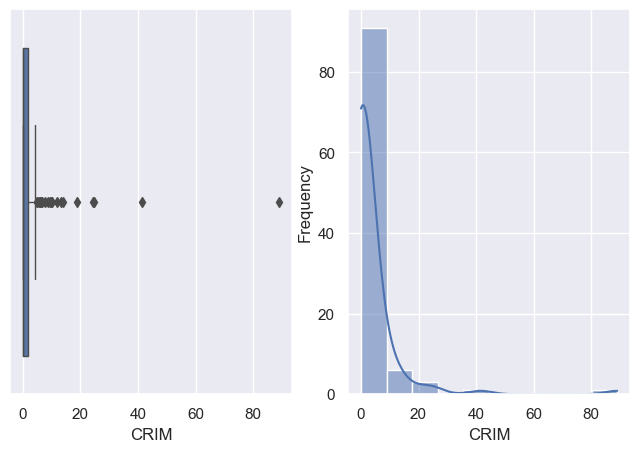

<Figure size 800x500 with 0 Axes>

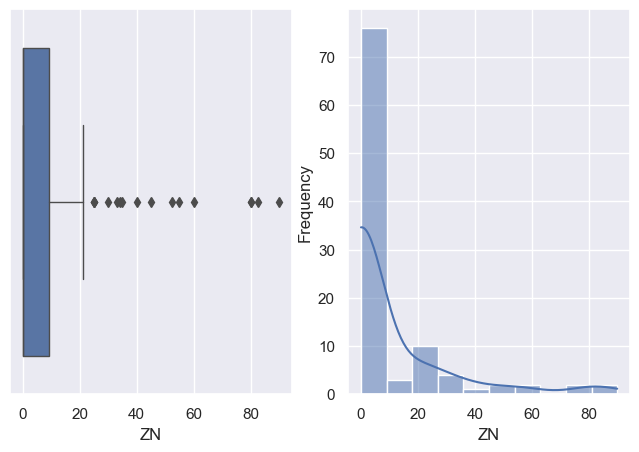

<Figure size 800x500 with 0 Axes>

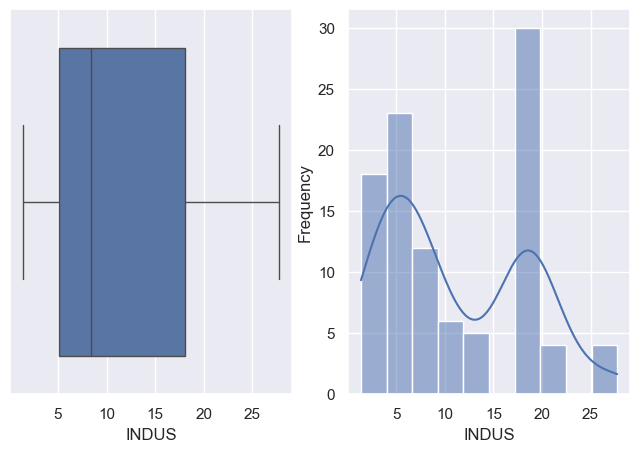

<Figure size 800x500 with 0 Axes>

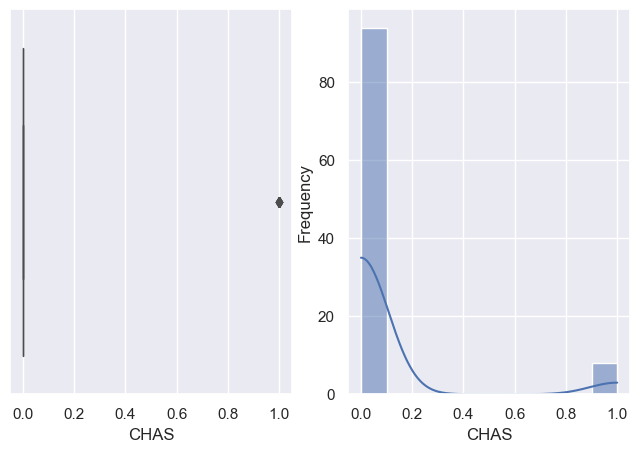

<Figure size 800x500 with 0 Axes>

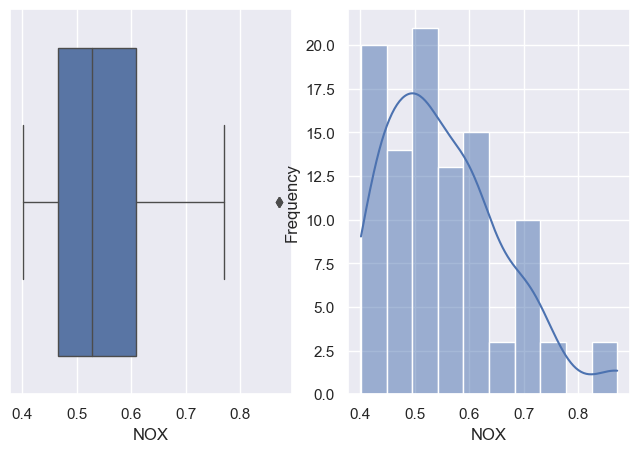

<Figure size 800x500 with 0 Axes>

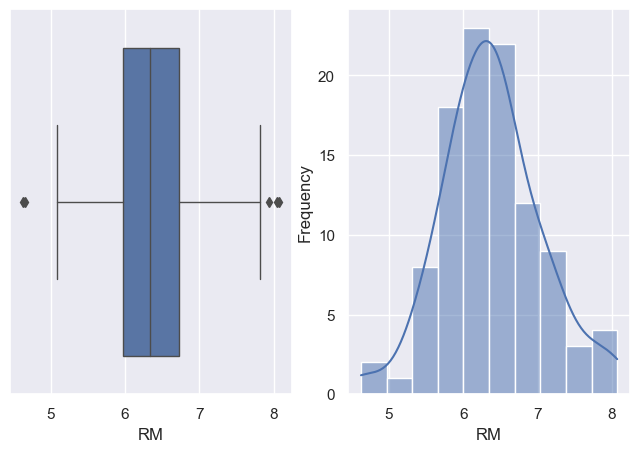

<Figure size 800x500 with 0 Axes>

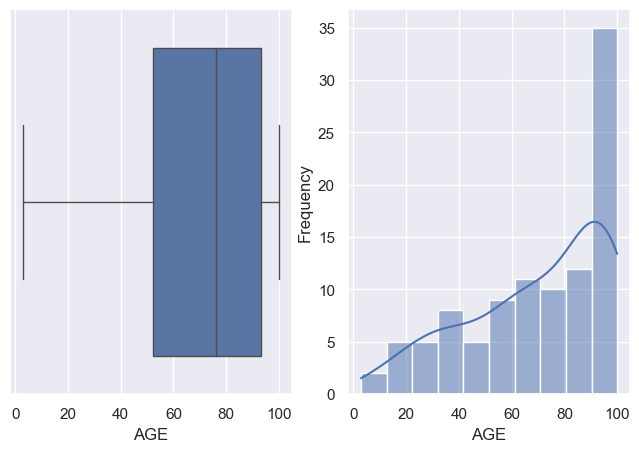

<Figure size 800x500 with 0 Axes>

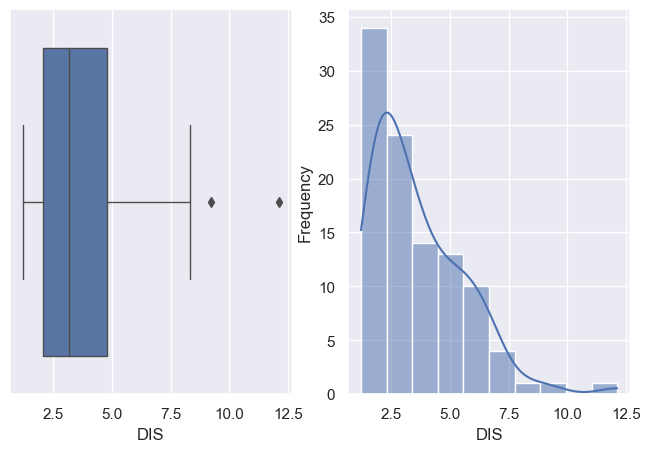

<Figure size 800x500 with 0 Axes>

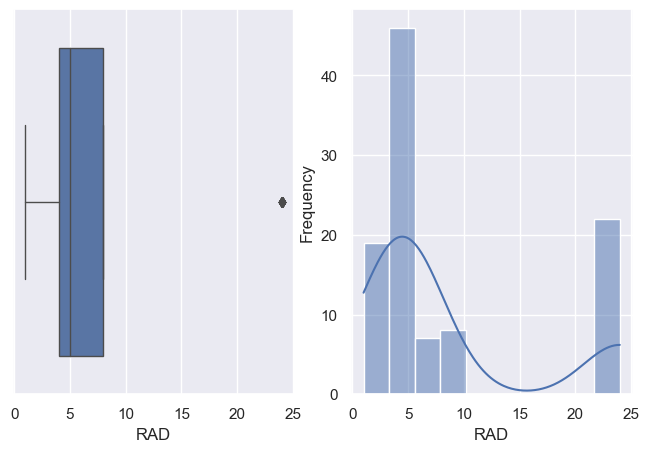

<Figure size 800x500 with 0 Axes>

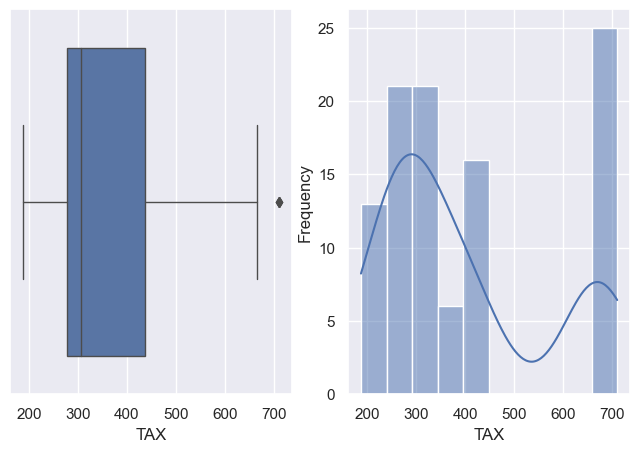

<Figure size 800x500 with 0 Axes>

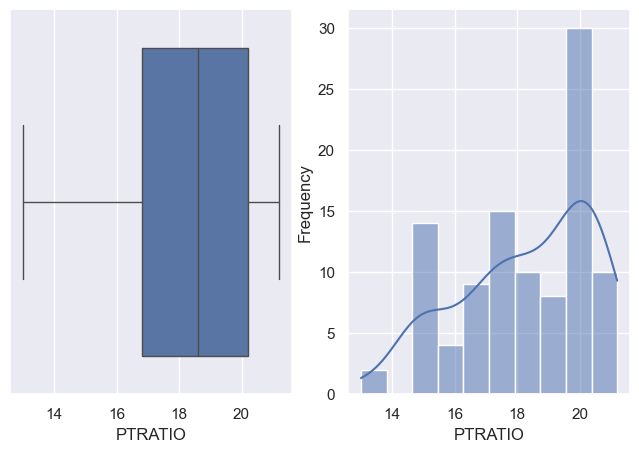

<Figure size 800x500 with 0 Axes>

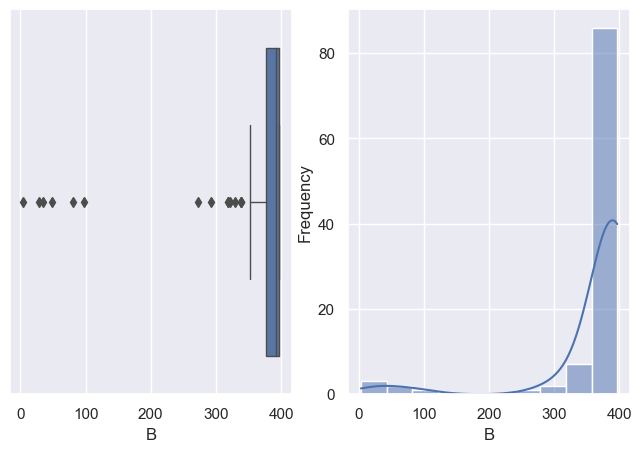

<Figure size 800x500 with 0 Axes>

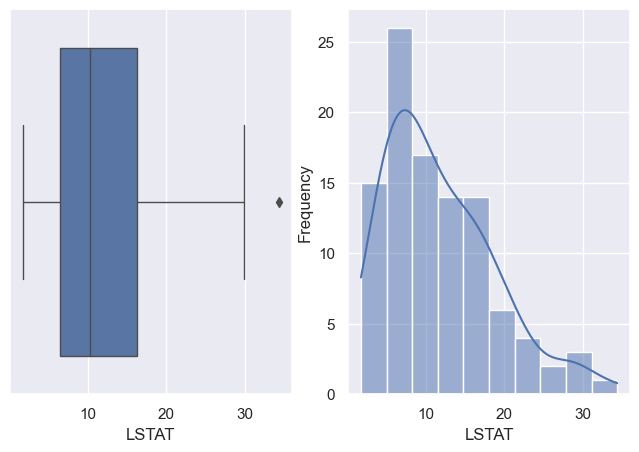

In [22]:
#Grafiquem les variables per veure els outliers utilitzant boxplot
import warnings
warnings.filterwarnings("ignore")

for i in X_train.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(1, 2, sharex=True)
    plt.gca().set(xlabel=i, ylabel='Frequency')
    sns.boxplot(X_test[i], ax=ax_box, linewidth=1, orient='v')
    sns.histplot(X_test[i], ax=ax_hist, bins=10, kde=True)
plt.show()

### TIPUS DE VARIABLES QUE TENIM (Model Test):

Destquem que els resultats son semblants al del Model d'entrenament ja que ens dona que no tenim cap distribució normal o Gaussiana en el test d'hipotesi Saphiro i el mateix tipus de variables amb outliers.
A més a més veiem que els gràfics més o menys seguiexen una mateixa distribució que el Model Train

Destacaria que la variable **RM sembla** que tingui una forma **Gaussiana** o distribució normal, **podriem fer un power transform + estandarització** però com que **te outliers** prefereixo fer un **RobustScaler**

La variable MEDV com que és la nostra variable ojectiu (target) **no la transformem**

In [23]:
#Fem una copia del df original per tal de transofrmarlo amb el preprocessat
housing_trans = housing.copy()

In [31]:
#Importem llibreria
from sklearn import preprocessing

#RobustScaler para las variables con outliers
outl_col = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
Robust_scaler = preprocessing.RobustScaler().fit(housing_trans[outl_col])
housing_trans[outl_col] = Robust_scaler.transform(housing_trans[outl_col])

#Mostrem les primeres files el nou df 
housing_trans.head(10)

CRIM    ZN  INDUS  CHAS    NOX        RM    AGE       DIS  RAD    TAX  \
0 -0.069593  1.44   2.31     0  0.538  0.496612   65.2  0.285777    1  296.0   
1 -0.063755  0.00   7.07     0  0.469  0.287940   78.9  0.569789    2  242.0   
2 -0.063760  0.00   7.07     0  0.469  1.323171   61.1  0.569789    2  242.0   
3 -0.062347  0.00   2.18     0  0.458  1.069783   45.8  0.924391    3  222.0   
4 -0.052144  0.00   2.18     0  0.458  1.271680   54.2  0.924391    3  222.0   
5 -0.063048  0.00   2.18     0  0.458  0.300136   58.7  0.924391    3  222.0   
6 -0.046792  1.00   7.87     0  0.524 -0.266260   66.6  0.761936    5  311.0   
7 -0.031143  1.00   7.87     0  0.524 -0.049458   96.1  0.888221    5  311.0   
8 -0.012592  1.00   7.87     0  0.524 -0.782520  100.0  0.930835    5  311.0   
9 -0.024053  1.00   7.87     0  0.524 -0.277100   85.9  1.095977    5  311.0   

    PTRATIO         B     LSTAT  MEDV  
0 -1.339286  0.261902 -0.637681  24.0  
1 -0.446429  0.261902 -0.221889  21.6  
2 -0.446429  0.066675 -0.732634  34.7  
3 -0.125000  0.153016 -0.841579  33.4  
4 -0.125000  0.261902 -0.602699  36.2  
5 -0.125000  0.128553 -0.614693  28.7  
6 -1.375000  0.199544  0.106947  22.9  
7 -1.375000  0.261902  0.778611  27.1  
8 -1.375000 -0.230723  1.856072  16.5  
9 -1.375000 -0.226886  0.573713  18.9

In [32]:
#Normalización para las variables que no tienen distribución normal
NOoutl_col = ['INDUS', 'NOX', 'AGE', 'TAX']

MinMax_scaler = preprocessing.MinMaxScaler().fit(housing_trans[NOoutl_col])
housing_trans[NOoutl_col] = MinMax_scaler.transform(housing_trans[NOoutl_col])

housing_trans.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   

   RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0    1  0.208015 -1.339286  0.261902 -0.637681  24.0  
1    2  0.104962 -0.446429  0.261902 -0.221889  21.6  
2    2  0.104962 -0.446429  0.066675 -0.732634  34.7  
3    3  0.066794 -0.125000  0.153016 -0.841579  33.4  
4    3  0.066794 -0.125000  0.261902 -0.602699  36.2

### Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [33]:
#Info
housing_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Observacions:**
_veiem que es mantenen tots els valors iguals pel que fa a Nulls, Dtypes, número de columnes i número de files_

In [50]:
#Describe
re_housing_trans = housing_trans.describe().T
re_housing_trans['median'] = housing_trans.median()
re_housing_trans.round(3)

count    mean    std     min     25%     50%     75%     max  median
CRIM     506.0   0.934  2.393  -0.070  -0.049  -0.000   0.951  24.678  -0.000
ZN       506.0   0.909  1.866   0.000   0.000   0.000   1.000   8.000   0.000
INDUS    506.0   0.391  0.251   0.000   0.173   0.338   0.647   1.000   0.338
CHAS     506.0   0.069  0.254   0.000   0.000   0.000   0.000   1.000   0.000
NOX      506.0   0.349  0.238   0.000   0.132   0.315   0.492   1.000   0.315
RM       506.0   0.103  0.952  -3.587  -0.438   0.000   0.562   3.484   0.000
AGE      506.0   0.676  0.290   0.000   0.434   0.768   0.939   1.000   0.768
DIS      506.0   0.190  0.682  -0.673  -0.359   0.000   0.641   2.888   0.000
RAD      506.0   9.549  8.707   1.000   4.000   5.000  24.000  24.000   5.000
TAX      506.0   0.422  0.322   0.000   0.176   0.273   0.914   1.000   0.273
PTRATIO  506.0  -0.212  0.773  -2.304  -0.589   0.000   0.411   1.054   0.000
B        506.0  -1.668  4.379 -18.761  -0.770   0.000   0.230   0.262   0.000
LSTAT    506.0   0.129  0.714  -0.963  -0.441   0.000   0.559   2.660   0.000
MEDV     506.0  22.533  9.197   5.000  17.025  21.200  25.000  50.000  21.200

In [54]:
re_housing_train.round(3)

count     mean      std      min      25%      50%      75%      max  \
CRIM     404.0    3.628    8.061    0.009    0.084    0.266    3.840   73.534   
ZN       404.0   11.823   24.056    0.000    0.000    0.000   12.500  100.000   
INDUS    404.0   11.120    6.761    0.460    5.190    9.690   18.100   27.740   
CHAS     404.0    0.067    0.250    0.000    0.000    0.000    0.000    1.000   
NOX      404.0    0.555    0.118    0.385    0.448    0.538    0.631    0.871   
RM       404.0    6.260    0.711    3.561    5.877    6.170    6.591    8.780   
AGE      404.0   68.275   28.559    6.000   42.550   77.900   94.100  100.000   
DIS      404.0    3.834    2.137    1.130    2.111    3.231    5.219   10.710   
RAD      404.0    9.765    8.823    1.000    4.000    5.000   24.000   24.000   
TAX      404.0  411.032  168.635  188.000  280.500  334.000  666.000  711.000   
PTRATIO  404.0   18.500    2.173   12.600   17.400   19.100   20.200   22.000   
B        404.0  354.911   93.365    0.320  374.702  391.260  396.242  396.900   
LSTAT    404.0   12.868    7.178    1.920    7.185   11.675   17.102   37.970   
MEDV     404.0   22.331    9.194    5.000   16.775   21.000   24.725   50.000   

          median  
CRIM       0.266  
ZN         0.000  
INDUS      9.690  
CHAS       0.000  
NOX        0.538  
RM         6.170  
AGE       77.900  
DIS        3.231  
RAD        5.000  
TAX      334.000  
PTRATIO   19.100  
B        391.260  
LSTAT     11.675  
MEDV      21.000

**Observacions**

Veiem ràpidamen com els valors després del preprocessat son tots molt més baixos i més propers entre ells, el que afecta a les diferències que comentavem al principi respecte a STD, mean i median, cuartils. Així serà molt més precis la predicció, les dades estan preparades. 

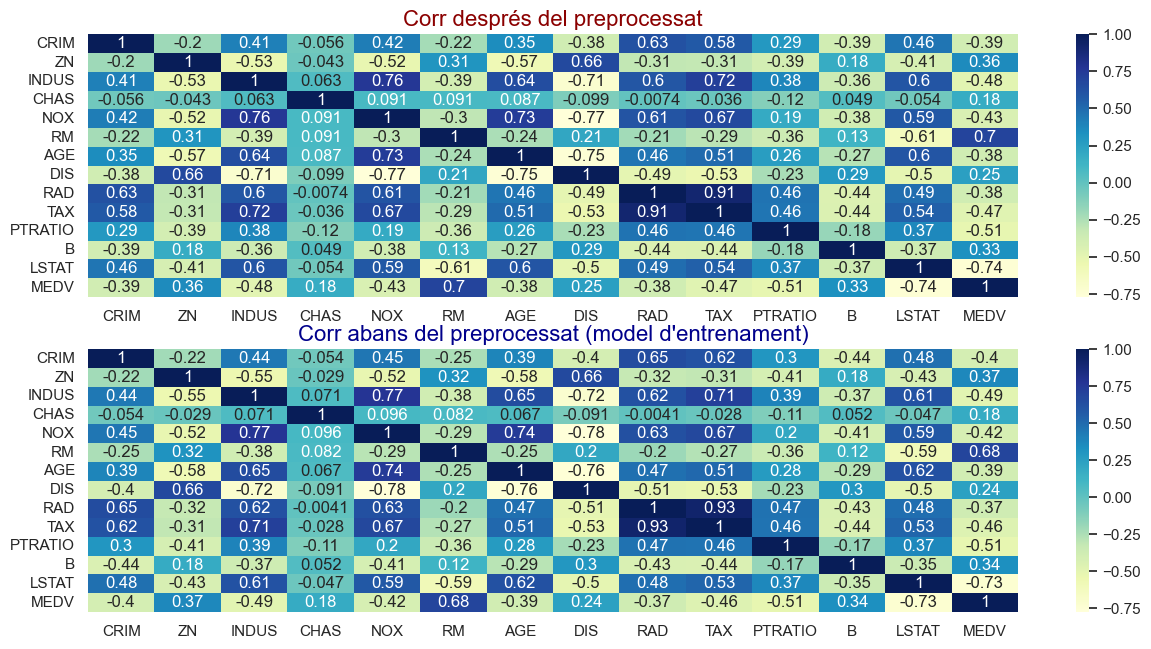

In [53]:
#corr
fig, axs = plt.subplots (nrows=2, figsize=(15,7.5))
sns.heatmap(housing_trans.corr(), annot = True, cmap="YlGnBu", ax=axs[0])
sns.heatmap(housing_train.corr(), annot = True, cmap="YlGnBu", ax=axs[1])

axs[0].set_title("Corr després del preprocessat", fontsize=16, color='Darkred')
axs[1].set_title("Corr abans del preprocessat (model d'entrenament)", fontsize=16, color='Darkblue')

plt.show()

**Observacions**
Hem fet una compartiva de la correlació. Veiem que es mantenen bastant estables el qual significa que evidentment, no ha afectat a la relació entre les variables l'escalació de les variables durant el preprocessat. 

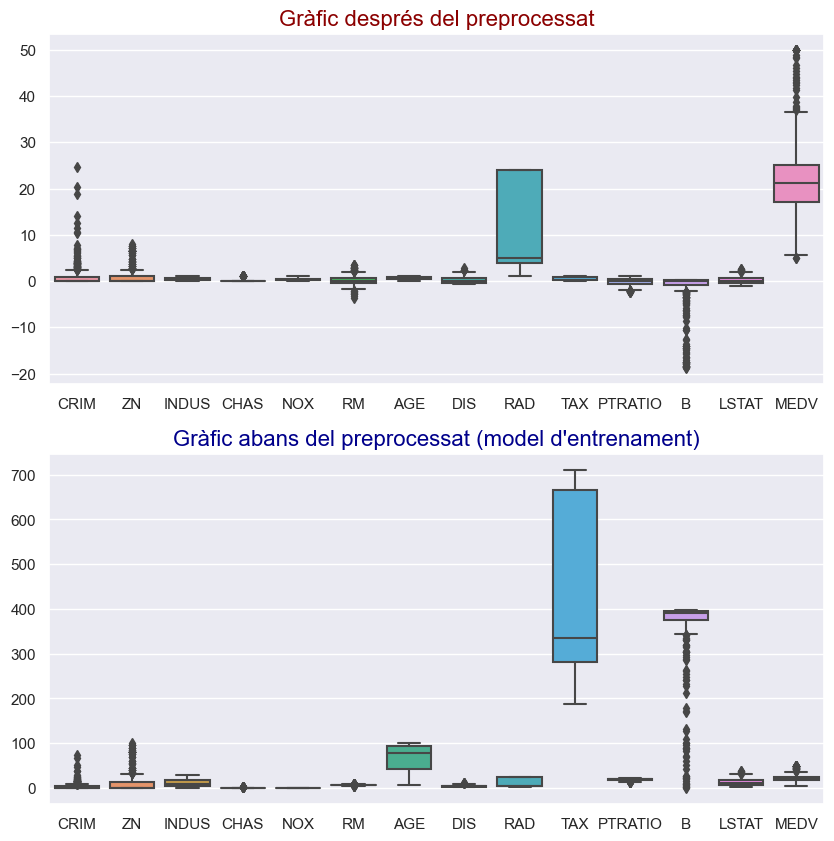

In [49]:
#Comparativa housing i housing_trans abans i després amb boxplot
fig, axs = plt.subplots (nrows=2, figsize=(10,10))
sns.boxplot(data=housing_trans, ax= axs[0])
sns.boxplot(data=housing_train, ax= axs[1])

axs[0].set_title("Gràfic després del preprocessat", fontsize=16, color='Darkred')
axs[1].set_title("Gràfic abans del preprocessat (model d'entrenament)", fontsize=16, color='Darkblue')

plt.show()

**Observacions**
Finalment, també fem una comparitva amb boxplot per veure com han evolucionat els outliers. Veiem com efectivament les variables després del preprocessat estan molt més juntes i el mateix passa amb els outliers.

## Estem preparats per definir un model i entrenar-lo